In [2]:
import pandas as pd
import Orange
import seaborn as sn

In [153]:
sn.set()
sn.palplot(sn.husl_palette(10))

In [81]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from datetime import datetime as tgl

In [4]:
df=pd.read_csv('trainingSet.csv')

In [1]:
#Winter - Dec, Jan and Feb 
#Spring - Mar, Apr, May 
#Summer - Jun, Jul, Aug 
#Fall/Autumn - Sep, Oct, Nov 
def what_month(dt):
    splitdt=dt.split('/')
    if splitdt[0]=='01' or splitdt[0]=='02' or splitdt[0]=='12':
        return 'Winter'
    if splitdt[0]=='03' or splitdt[0]=='04' or splitdt[0]=='05':
        return 'Spring'
    if splitdt[0]=='06' or splitdt[0]=='07' or splitdt[0]=='08':
        return 'Summer'
    if splitdt[0]=='09' or splitdt[0]=='10' or splitdt[0]=='11':
        return 'Fall'
    
def name_of_month(dt):
    splitdt=dt.split('/')
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    return months[int(splitdt[0])-1]

def num_of_month(dt):
    splitdt=dt.split('/')
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    return int(splitdt[0])
def bureau(dt):
    if(dt in [1,2,4,11,13]):
        return "Central"
    if(dt in [3,5,12,18]):
        return "South"
    if(dt in [6,7,8,14,20]):
        return "West"
    return "Valley"
def holiday(dt):
    dt=dt.split('/')
    dt=dt[0]+'/'+dt[1]
    if(dt=="02/29"):
        return "normal"
    if(tgl.strptime(dt,"%m/%d"))<=(tgl.strptime("01/04","%m/%d")):
        return "holiday"
    if(tgl.strptime("01/14","%m/%d"))<=(tgl.strptime(dt,"%m/%d"))<=(tgl.strptime("01/18","%m/%d")):
        return "holiday"
    if(tgl.strptime("02/02","%m/%d"))<=(tgl.strptime(dt,"%m/%d"))<=(tgl.strptime("02/06","%m/%d")):
        return "holiday"
    if(tgl.strptime("02/18","%m/%d"))<=(tgl.strptime(dt,"%m/%d"))<=(tgl.strptime("02/22","%m/%d")):
        return "holiday"
    if(tgl.strptime("03/29","%m/%d"))<=(tgl.strptime(dt,"%m/%d"))<=(tgl.strptime("04/02","%m/%d")):
        return "holiday"
    if(tgl.strptime("04/14","%m/%d"))<=(tgl.strptime(dt,"%m/%d"))<=(tgl.strptime("04/18","%m/%d")):
        return "holiday"
    if(tgl.strptime("05/27","%m/%d"))<=(tgl.strptime(dt,"%m/%d"))<=(tgl.strptime("05/31","%m/%d")):
        return "holiday"
    if(tgl.strptime("09/02","%m/%d"))<=(tgl.strptime(dt,"%m/%d"))<=(tgl.strptime("09/06","%m/%d")):
        return "holiday"
    if(tgl.strptime("11/08","%m/%d"))<=(tgl.strptime(dt,"%m/%d"))<=(tgl.strptime("11/13","%m/%d")):
        return "holiday"
    if(tgl.strptime("11/21","%m/%d"))<=(tgl.strptime(dt,"%m/%d"))<=(tgl.strptime("11/26","%m/%d")):
        return "holiday"
    if(tgl.strptime("12/23","%m/%d"))<=(tgl.strptime(dt,"%m/%d"))<=(tgl.strptime("12/27","%m/%d")):
        return "holiday"
    if(tgl.strptime(dt,"%m/%d"))==(tgl.strptime("07/04","%m/%d")):
        return "holiday"
    if(tgl.strptime(dt,"%m/%d"))>=(tgl.strptime("12/30","%m/%d")):
        return "holiday"
    return "normal"
def lat(x):
    return float(x[1:len(x)-1].split(',')[0])
def lng(x):
    return float(x[1:len(x)-1].split(',')[1])
def kategori(Crm):
    if(Crm == 648):
        return "arson"
    if(Crm == 230 or Crm == 231 or Crm == 235 or Crm == 236 or Crm == 250 or Crm == 251 or Crm == 435 or Crm == 436 or Crm == 622 or Crm == 623 or Crm == 624 or Crm == 625 or Crm == 626 or Crm == 627 or Crm == 647):
        return "assault"
    if(Crm == 942):
        return "bribe"
    if(Crm == 310 or Crm == 320 or Crm == 330 or Crm == 410 or Crm == 973):
        return "burglary"
    if(Crm == 649 or Crm == 651 or Crm == 652 or Crm == 653 or Crm == 654 or Crm == 660):
        return "forgery"
    if(Crm == 900 or Crm == 901 or Crm == 902 or Crm == 903):
        return "curfew"
    if(Crm == 438 or Crm == 755 or Crm == 763 or Crm == 880 or Crm == 882 or Crm == 884 or Crm == 886):
        return "disorderlyconduct"
    if(Crm == 865):
        return "drugs"
    if(Crm ==433 or Crm == 668 or Crm == 670):
        return "embezzlement"
    if(Crm == 928 or Crm == 930 or Crm == 946):
        return"BlackMail"
    if(Crm == 870 or Crm == 237):
        return "Family Offense"
    if(Crm == 662 or Crm == 664 or Crm == 950 or Crm == 951):
        return "fraud"
    if(Crm == 110 or Crm == 113):
        return "homicide"
    if(Crm == 910 or Crm == 920 or Crm == 922):
            return "kidnapping"
    if(Crm ==331 or Crm == 480 or Crm == 485 or Crm == 407 or Crm == 510 or Crm == 520):
        return "motor theft"
    if(Crm == 805 or Crm == 806):
        return "prostitution"
    if(Crm ==210 or Crm == 220):
        return "robbery"
    if(Crm == 121 or Crm == 122 or Crm == 762 or Crm == 810 or Crm == 815 or Crm == 820 or Crm == 821 or Crm == 836 or Crm == 840 or Crm == 845 or Crm == 860 or Crm == 850 or Crm == 932 or Crm == 956):
        return "sex offense"
    if(Crm == 888):
        return "trespassing"
    if(Crm == 740 or Crm == 744 or Crm == 924):
        return "vandalism"
    if(Crm ==753 or Crm == 756 or Crm == 761 or Crm == 931):
        return "weapon law"
    if(Crm == 331 or Crm == 341 or Crm == 343 or Crm == 345 or Crm == 347 or Crm == 349 or Crm == 354 or Crm == 430):
        return "grand theft"
    if(Crm == 350 or Crm == 351 or Crm == 352 or Crm == 353 or Crm == 420 or Crm == 421 or Crm == 431 or Crm >=440 and Crm <=475 ):
        return "theft"
    if(Crm == 997):
        return "traffic"
    if(Crm == 812 or Crm == 813):
        return "Children"
    return "MISC"

In [5]:
df['season']=df['DATE.OCC'].apply(what_month)

In [6]:
df['day_of_week']=pd.to_datetime(df['DATE.OCC']).dt.weekday_name

In [7]:
df['month_num']=df['DATE.OCC'].apply(num_of_month)

In [8]:
df['month_name']=df['DATE.OCC'].apply(name_of_month)

In [9]:
df['bureau']=df['AREA'].apply(bureau)

In [10]:
df['holiday']=df['DATE.OCC'].apply(holiday)

In [11]:
df['lat']=df['Location.1'].apply(lat)

In [12]:
df['lng']=df['Location.1'].apply(lng)

In [13]:
df['type']=df['Crm.Cd'].apply(kategori)

In [52]:
df[df['type']=='grand theft'].groupby('CrmCd.Desc').size()

CrmCd.Desc
DISHONEST EMPLOYEE - GRAND THEFT                               63
GRAND THEFT / AUTO REPAIR                                       7
GRAND THEFT / INSURANCE FRAUD                                   4
PROPERTY MISSING RVD VEH - GRAND                               11
PROPERTY MISSING RVD VEH - GRAND THEFT ($950.01 & OVER)        13
SHOPLIFTING-GRAND THEFT ($950.01 & OVER)                     1303
SHOPLIFTING-GRAND THEFT (OVER $401)                           161
THEFT OF IDENTITY                                           55945
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    23901
THEFT-GRAND (OVER $400 OR $100 IF FOWL)                      6465
dtype: int64

In [21]:
df[df['day_of_week']=='Friday'].groupby(['AREA.NAME','day_of_week'])['DATE.OCC'].count()

AREA.NAME    day_of_week
77th Street  Friday         11461
Central      Friday          7372
Devonshire   Friday          8214
Foothill     Friday          6252
Harbor       Friday          7316
Hollenbeck   Friday          6327
Hollywood    Friday          7678
Mission      Friday          8421
N Hollywood  Friday          9064
Newton       Friday          7777
Northeast    Friday          8098
Olympic      Friday          7902
Pacific      Friday          8985
Rampart      Friday          6929
Southeast    Friday          8249
Southwest    Friday         10833
Topanga      Friday          7828
Van Nuys     Friday          8291
West LA      Friday          8060
West Valley  Friday          7470
Wilshire     Friday          7452
Name: DATE.OCC, dtype: int64

In [110]:
df.groupby(['AREA'])['lat','lng'].mean()

lat         lng
AREA                       
1     33.772075 -117.301693
2     33.814950 -117.410128
3     33.646022 -117.022423
4     33.630516 -116.724520
5     33.421856 -117.060749
6     33.817085 -117.352568
7     33.857526 -117.645040
8     33.795914 -117.548616
9     33.947397 -117.645247
10    34.073197 -118.124811
11    33.829637 -117.276557
12    33.860361 -117.889261
13    33.835541 -117.664297
14    33.518854 -116.799979
15    33.869040 -117.334131
16    33.978369 -117.443634
17    33.970143 -117.567584
18    33.714613 -117.482912
19    34.028453 -117.664164
20    33.925934 -117.836481
21    33.959510 -117.789654

In [138]:
day_index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
month_index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [113]:
dayFrame=pd.DataFrame(df.groupby(['day_of_week']).size().rename('count').reset_index())

In [122]:
dayFrame['day_of_week']=pd.Categorical(dayFrame['day_of_week'],day_index)

In [154]:
data=pd.concat([dayFrame['count'],dayFrame['day_of_week']],axis=1)
f, ax=plt.subplots(figsize=(8,10))
fig=sn.barplot(x='day_of_week',y='count',data=data)
fig.axis(ymin=0,ymax=180000)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

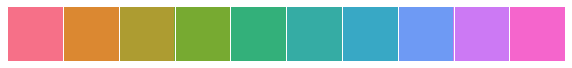

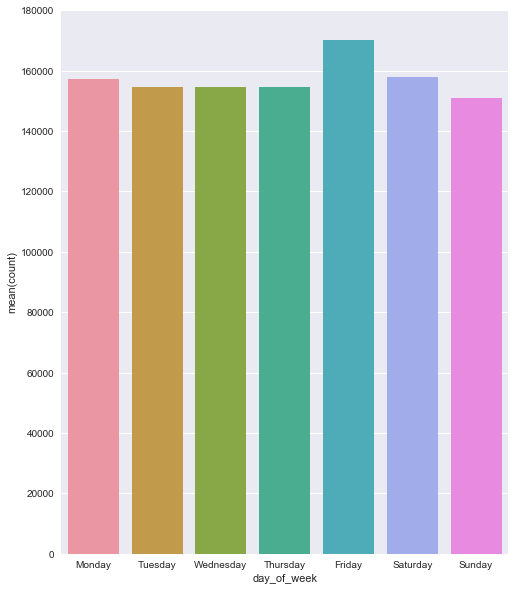

In [155]:
plt.show()

In [139]:
monthDf=pd.DataFrame(df.groupby(['month_name'])['DATE.OCC'].size().rename('count').reset_index())
monthDf['month_name']=pd.Categorical(monthDf['month_name'],month_index)

In [142]:
data=pd.concat([monthDf['count'],monthDf['month_name']],axis=1)
f, ax=plt.subplots(figsize=(8,10))
fig=sn.barplot(x='month_name',y='count',data=data)
fig.axis(ymin=0,ymax=110000)
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

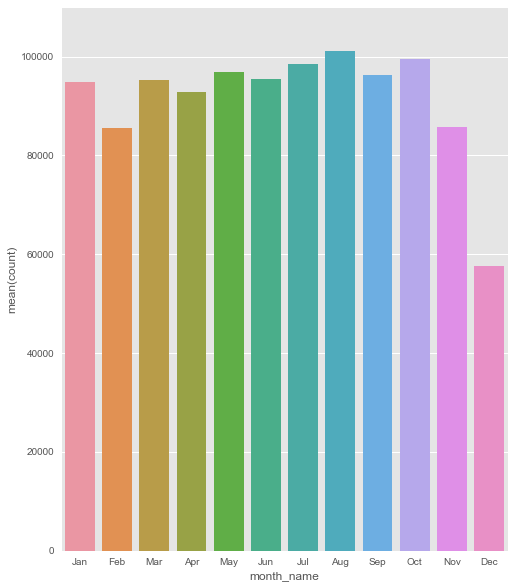

In [143]:
plt.show()

In [144]:
seasonIndex=['Spring','Summer','Fall','Winter']
seasonDf=pd.DataFrame(df.groupby(['season']).size().rename('count').reset_index())
seasonDf['season']=pd.Categorical(seasonDf['season'],seasonIndex)

In [156]:
data=pd.concat([seasonDf['count'],seasonDf['season']],axis=1)
f, ax=plt.subplots(figsize=(8,10))
fig=sn.barplot(x='season',y='count',data=data)
fig.axis(ymin=0,ymax=320000)
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

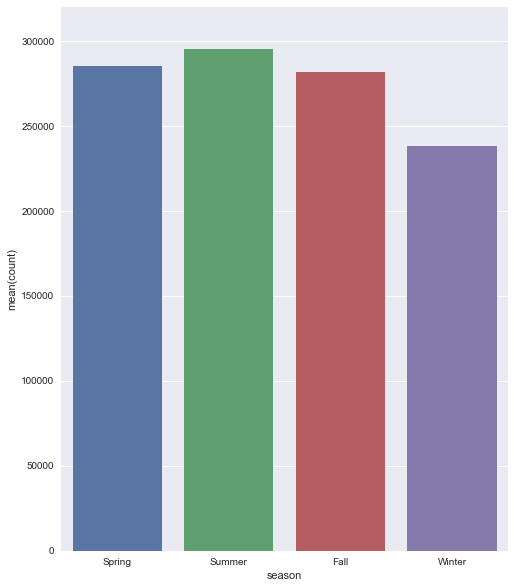

In [157]:
plt.show()

In [ ]:
df.groupby('CrmCd.Desc').size().sort_values(ascending=False).rename('count').reset_index()

In [63]:
descFrame=pd.DataFrame(df.groupby(['type']).size().sort_values(ascending=False).rename('count').reset_index())

In [74]:
data=pd.concat([descFrame['count'],descFrame['type']],axis=1)
f, ax=plt.subplots(figsize=(13,13))
fig=sn.barplot(x='type',y='count',data=descFrame.head(40))
fig.axis(ymin=0,ymax=200000)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

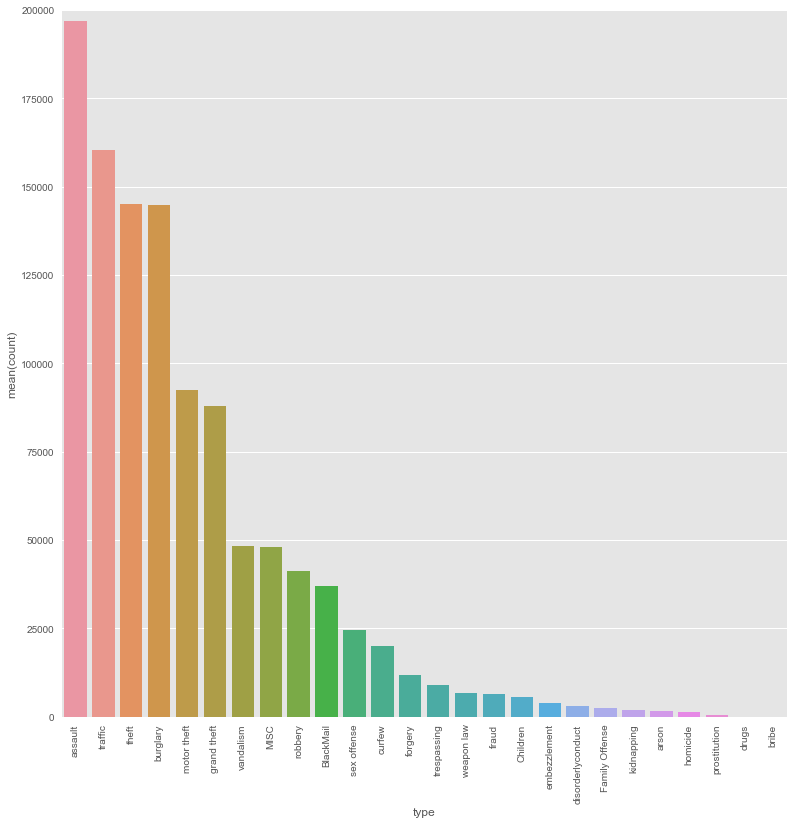

In [44]:
plt.show()